# 4 - 1D Hamiltonian

## Intro

### <i class="fa fa-smile-o"></i> Undergrads:

The good news is that this problem set only has two parts to it.

The even better news is that, to strengthen your programming skills, this p-set has a lot less "skeleton code" to guide you. You'll have to write more of the code from scratch. 

### Grad students:

This homework will be a little bit long, but don't worry, after this journey, if somebody stops you in the street asking if you have already solved the Schrödinger equation in one dimention, you can be like ** (smug face) yeah, whateves, even coded it for arbitrary potentials**. Many of the following homeworks and considerable exercises build on the skill you will utilize here.


### Instantaneous feedback :
We hope that by now you've had enough friendly exposure to iPython Notebook programming that you will be able to tackle this. Also, we've left as part of the notebook most of the figures that you should get as output if you write your code correctly, as a way to give instantaneous feedback to your code.


### So, let's import the modules you'll be needing, and enjoy!!

In [4]:
#Here is what we usually import
% matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import simps
import scipy as sp
from matplotlib import animation
##this let's us print out the available functions in our library,
## as well as the documentation
import pydoc 
# add all probables spots for the quantum world library
import sys
sys.path.append('../library')
sys.path.append('../../library')
sys.path.append('/home/student/chem160/library')
#This is how we'll import our own home-made modules
import quantumWorld as qworld

#### <i class="fa fa-medkit"></i> Help!
Remember you have the **help** function to ask for information on how a function is used:
```python
help(function)
```
#### <i class="fa fa-diamond"></i> Fancy plotting

The quantumWorld module also includes a function to make prettier plots via **fancy_plotting()**, with an optional argument **grid=False** which draws grids on the plot if desired.

# <i class="fa fa-check-circle-o"></i> Exercise 1: <br> Particle in a box with linear ramp

## 1.a - Define the potential function

Define a function called **PIB_1D_linear_ramp** with takes as input an array $x$ and a parameter $b$ and which returns a variable $Vx = bx$

## 1.2 - <i class="fa fa-line-chart"></i> Plot the potential
Create a 1D box of length $L=5$, (i.e. an array that goes from 0 to 5 in whatever size step you want) and plot the potential over the domain of the box with $b=1$

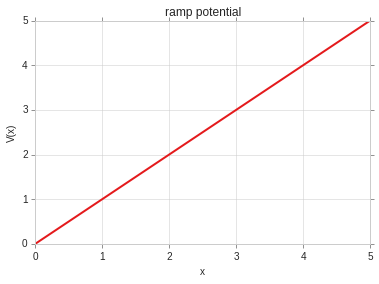


## 1.c - Use finite differences to get the ground state wavefunction.

Obtain and plot the the ground state wave function and associated pdf for different values of b.

Also calculate the expectation value $\langle x \rangle$ for each value of b, consider b = 0.01, 0.1, 1 and 10.

Then for each value of b in b_array, do the following: 

* Generate the potential Vx for that value of b.
* Generate the H matrix associated to that potential using **qworld.build_H_matrix**.
* Get the full set of eigenvalues and eigenvectors of H. (use **np.linalg.eigh**)
* Get the index for the lowest energy eigenvalue (use **numpy.argsort**).
* Get the eigenfunction associated to the lowest eigenvalue, calling it psi0.
* Normalize this eigenfunction using **qworld.normalize_wf**, calling this psi0_norm.
* Get the pdf associated to this eigenfunction (call it pdf).
* Get $\langle x \rangle$ for this eigenfunction, and store in a list x_exp_array.

### <i class="fa fa-line-chart"></i> And plot :

* In a single figure, plot, overlayed, the ground state eigenfunctions for each value of b.
* In another figure, plot, overlayed, the pdf associated to the ground state for each value of b


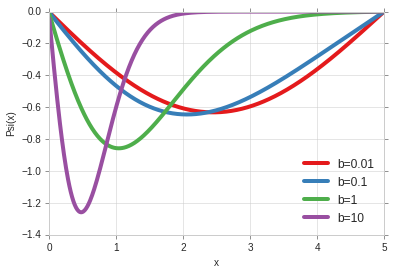

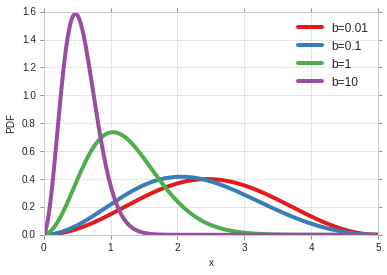

## 1.d - <i class="fa fa-line-chart"></i>  Expectation value $\langle x \rangle$ as a function of $b$.

**Note:** Since the range of values of $b$ is very large, you might want to use logarithmic scale using **semilogx** instead of **plot**.

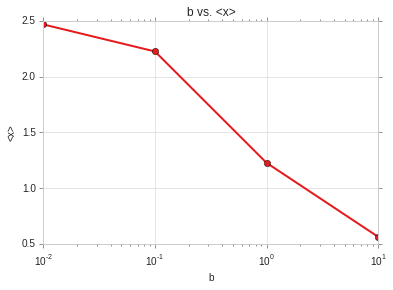

# <i class="fa fa-check-circle-o"></i> Exercise 2: <br> Diatomic molecule model with Coulomb potential


## The coulomb-like double well function

![](files/double_well.png)

The following function **coulomb_potential_1D_double** which generates a potential consisiting of a double well, each well falling as $f(x)=-\frac{1}{(x-x_i)}$, where $x_i$ is the center of the i-th well.  The inputs to the function will be **x**, a numpy array defining the domain, and **R**, the separation between the two centers of the wells. 


In [46]:
def coulomb_potential_1D_double(x,R):
    '''Create a double well, coulomb-like potential.
    Inputs:
    x --> numpy array of positions
    R --> the distance between the centers of the two wells
    '''
    Vx = np.zeros_like(x)
    L = max(x) - min(x) #length of domain
    x0_1 =  (L - R) / 2.0 #the first well
    x0_2 = x0_1 + R #center of the second well
    for i in range(len(Vx)):
        if x[i] == x0_1 or x[i] == x0_2:
            Vx[i] = Vx[i - 1]
        elif x[i] < max(x) / 2.0:
            Vx[i] = - 1.0 / np.abs(x[i] - x0_1)
        else:
            Vx[i] = - 1.0 / np.abs(x[i] - x0_2)
    return Vx

## 2.a - <i class="fa fa-line-chart"></i>  Generate and plot $V(x)$

Create an x array that goes from $x=0$ to $x = 2$.

And set R, the separation between the wells, to 0.5.

Generate the potential, call it Vx, and plot it.

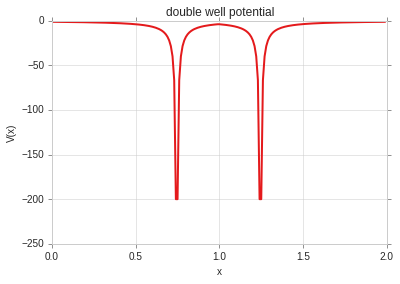

## 2.b - Build the $\hat{H}$ matrix

Use the function **quantumWorld.build_H_matrix** with the double well potential, and get its eigenvalues and eigenfunctions. 

## 2.c - <i class="fa fa-line-chart"></i> Two lowest eigenfunctions and pdf's.

Plot the two lowest energy eigenfunctions in one figure (overlayed) and their associated pdf's in another figure, overlayed

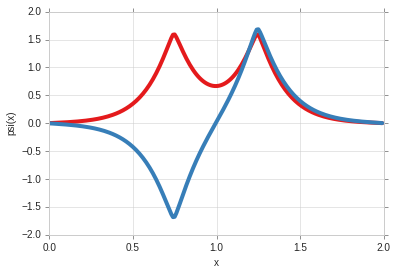

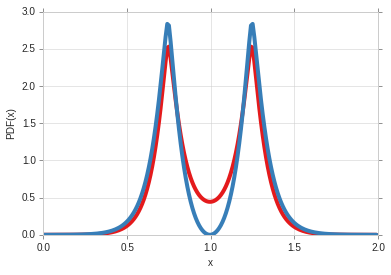

## 2.d - <i class="fa fa-line-chart"></i> Energy as a function of seperation $R$ 


Plot the energy of the two lowest eigenvalues as a function of the separation R, and capture the splitting of the two lowest energy eigenstates as the wells approach each other. 

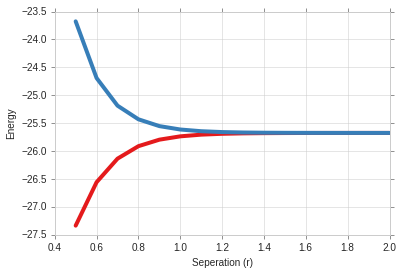

# <i class="fa fa-check-circle-o"></i> Exercise 3-6: <br>Discrete variable representation (DVR)
## <i class="fa fa-exclamation-triangle"></i> Grad students, required, 1 point each
## <i class="fa fa-smile-o"></i> Undergrad students, not required, 1 bonus point each
### Math-proof exercises can be turned in paper, or filled in using [markdown+latex](https://guides.github.com/features/mastering-markdown/)
## Intro:
Although wavefunctions typically live in infinite dimensional Hilbert
spaces, we cannot represent this space entirely on a computer due
to its finite memory and therefore a discrete basis representation
of the wavefunctions is often introduced. In particular, one represents
the wavefunction, for example in coordinate space $\Psi(x)$, using
a finite number of basis set functions $\left\{ \phi(x)\right\} _{i=1}^{N}$.

In this way, one can solve the Schrödinger equation in matrix form.
In this problem we will be using a Fourier uniform grid basis set
known as the Sinc basis set. You already know this! This was the extra exercise in PSET 2.

In particular, we introduce a grid of $N$ equispaced points in one
dimension on the interval $[x_{ min},x_{ max}]$ where each
grid point is defined as :

\begin{eqnarray}
x_{j} & = & x_{ min}+\Delta x\cdot(j-1)\\
\Delta x & = & \frac{x_{ max}-x_{ min}}{N-1}.
\end{eqnarray}

In this notation, the $j-th$ basis set function $\phi_{j}(x)$ is
defined as:
\begin{eqnarray}
\phi_{j}(x) & = & \frac{\sqrt{\Delta x}}{2\pi}\int_{-\pi/\Delta x}^{\pi/\Delta x}e^{ik(x-x_{j})}dk=\frac{1}{\sqrt{\Delta x}}\frac{{\rm sin}\left[\pi(x-x_{j})/\Delta x\right]}{\pi(x-x_{j})/\Delta x} \\
 & \equiv & \frac{1}{\sqrt{\Delta x}}{\rm sinc}\left[\pi(x-x_{j})/\Delta x\right].
\end{eqnarray}

For example the basis function $\psi_5 (x)$ for few and many points looks like:

![](files/sinc_basis.png)

We will represent the Hamiltonian operator for a particle in a one dimensional potential using this basis.

The Hamiltonian is 
$$\hat{H}=\hat{T}+\hat{V}=\frac{-\hbar^{2}}{2m}\frac{d^{2}}{dx^{2}}+V(x)$$

Before starting we will define a few parameters and functions for your code.

## Harmonic Oscillator Grid parameters

In [9]:
## Define grid parameters
xmin = -5  
xmax = 5          
N = 10         # Number of points
x = np.linspace(xmin,xmax,N)
dx = x[1]-x[0] # spacing

## Define parameters of Harmonic potential
m = 1    # Mass of particle
omega = 1    # For harmonic potential
hbar=1

## Define potential function
def harmV(x,m=1,w=1): return 0.5*m*(w**2)*(x**2)
# sinc basisfunction
def sinc_basis(x,xi): return np.sinc((x-xi)/dx)*(1.0/np.sqrt(dx))

# <i class="fa fa-check-circle-o"></i> Exercise 3: <br> Kinetic operator $\hat{T}$ the DVR way

Begin by calculating the kinetic energy matrix $$T_{ij}=-\frac{\hbar^{2}}{2m}\left\langle \phi_{i}\left|\frac{d^{2}}{dx^{2}}\right|\phi_{j}\right\rangle $$ 

## 3.a - <i class="fa fa-pencil"></i> $T_{ij}$ simplified
Using the following identity:
\begin{eqnarray*}
\left\langle \phi_{i}\left|\frac{d^{2}}{dx^{2}}\right|\phi_{j}\right\rangle  & = & \int_{-\infty}^{+\infty}\phi_{i}^{*}(x)\frac{d^{2}}{dx^{2}}\phi_{j}(x)dx\\
 & = & -\frac{\pi}{\Delta x}\frac{ sin \left[\pi(x_{i}-x_{j})/\Delta x\right]}{x_{i}-x_{j}}-2\frac{ cos \left[\pi(x_{i}-x_{j})/\Delta x\right]}{\left(x_{i}-x_{j}\right)^{2}}\\
 &  & +2\frac{ sin \left[\pi(x_{i}-x_{j})/\Delta x\right]}{\pi(x_{i}-x_{j})^{3}/\Delta x}.
\end{eqnarray*}
Show that the expression can be further simplified to: 

\begin{equation}
T_{ij}=-\frac{\hbar^{2}}{2m}\left\langle \phi_{i}\left|\frac{d^{2}}{dx^{2}}\right|\phi_{j}\right\rangle =\frac{\hbar^{2}(-1)^{i-j}}{2m\Delta x^{2}}\begin{cases}
\frac{2}{(i-j)^{2}} & \;;\; i\neq j\\
\frac{\pi^{2}}{3} & \;;\; i=j
\end{cases}.
\end{equation}

** Hint:** use Taylor Expansion for the $i=j$ case

## 3.b - Build the $\hat{T}$ matrix
Define the kinetic energy matrix $T$ (as in 3.a) as a function of the grid parameters introduced previously and create a function called **Tmatrix** which recieves as inputa grid position vector **x**. You can deduce **N** and **dx** from this vector.

Use $m=1$ and $\hbar=1$.

In [7]:
def Tmatrix(x):
    N=len(x)
    T = np.zeros((N,N));
    dx=x[1]-x[0]

    return T

# <i class="fa fa-check-circle-o"></i> Exercise 4: <br> Potential operator $\hat{V}$ the DVR way

To complete the Hamiltonian we need to have a matrix representation
for the potential $\hat{V}$.

The potential energy operator can be expanded
in a series of powers of the position operator $\hat{x}$.

Therefore, to find its representation, all we need is the representation of $\hat{x}$. 


## 4.a - <i class="fa fa-pencil"></i> $\hat{V}$ with the basis functions
Show that $\left\langle \phi_{i}\left|\hat{x}\right|\phi_{j}\right\rangle =x_{i}\delta_{ij}$
and therefore that
$$
\left\langle \phi_{i}\left|V(x)\right|\phi_{j}\right\rangle =V(x_{i})\delta_{ij}.
$$

## 4.b - Build the $\hat{V}$ matrix

Define the potential energy matrix $V$ (as in 4.a) as a
function of the grid parameters introduced previously and using the
harmonic potential $$V(x)=\frac{1}{2}m\omega^{2}x^{2} \text{ with }\omega=1$$

**Hint**: There is already a harmonic potential function **harmV(x)**, and you canc reate a diagonal matrix from a vector with **np.diag(x)**.


### <i class="fa fa-line-chart"></i>  Make a plot of the potential energy function on your grid.

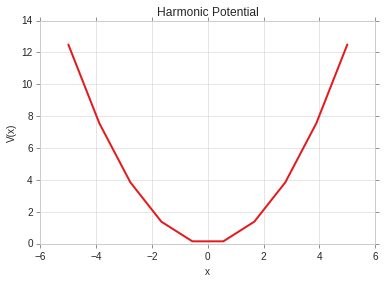

## 4.c Build the $\hat{H}$ matrix
This is just $$H_{ij}=T_{ij}+V_{ij}$$

Make a function called **Hmatrix** which recieves as input:

* **x:** Grid position vector.
* **vx:** Vector containing the potential function evaluated at **x**.

And returns the hamiltonian matrix 

In [11]:
def Hmatrix(x,vx):
    # Kinetic

    # potential 

    
    return H

# <i class="fa fa-check-circle-o"></i> Exercise 5: <br> Solving the Schrödinger equation with DVR.

You have now built the Hamiltonian in a discretized basis set. This means :
### you can solve almost any time-independent Schrödinger equation in one dimension!


## 5.a - Eigenvalues

As you know, for a Harmonic
oscillator the eigenvalues should be 
$$\epsilon_{k}=\hbar\omega \left (\frac{1}{2}+k \right)\;;\; k=0,1,2...$$

We will test your $H$ matrix with a numpy numerical routine that returns eigenvectors and eigenvalues (**np.linalg.eig(M)**).

### <i class="fa fa-line-chart"></i>  Make a log plot of the error $|\epsilon_{numeric,k}-\epsilon_{ k}|$vs  $k$

**Note:** You can make y-log plots in matplotlib with **semilogy** or using **yscale('log')**.

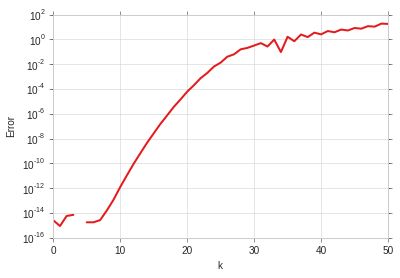

In [86]:
def harmonic_eigen(k): return hbar*omega*(0.5+k)



plt.xlabel('k')
plt.ylabel('Error')
plt.show()

###  <i class="fa fa-question-circle"></i> What do you notice? 
### Comment on the trend ofthe error plot.
### How could you improve the agreement with the exact values?

Answer here

## 5.b - Effects of grid parameters on error
Experiment with two different setups:

* Check error for the first 100 eigenvalues: Increasing width (xmin and xmax), with fixed spacing (dx=0.1).
* Check error for the first 50 eigenvalues: Fixed width or xrange (xmin=-10 and xmax=10) but decreasing spacing (dx)

**Tip :** You might want to use python's [*slicing notation*](http://stackoverflow.com/questions/509211/explain-pythons-slice-notation) for arrays..in particular you get use **a[:end]** if you want the first elements until **end-1**, for a more complete overview:
```python
a[start:end] # items start through end-1
a[start:]    # items start through the rest of the array
a[:end]      # items from the beginning through end-1
a[:]         # a copy of the whole array
a[start:end:step] # start through not past end, by step
```

### <i class="fa fa-line-chart"></i> Increasing width


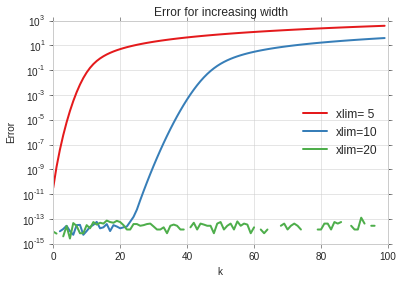

In [88]:


plt.legend(loc='best')
plt.title('Error for increasing width')
plt.xlabel('k')
plt.ylabel('Error')
plt.show()

### <i class="fa fa-line-chart"></i> Decreasing spacing

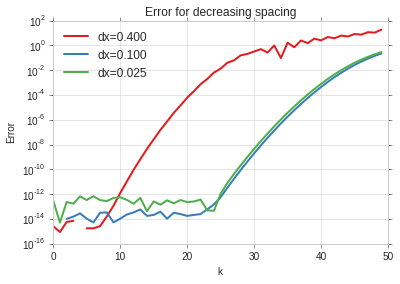

In [89]:


plt.legend(loc='best')
plt.title('Error for decreasing spacing')
plt.xlabel('k')
plt.ylabel('Error')
plt.show()

###  <i class="fa fa-question-circle"></i> What do you notice? 
### Comment on the trends you observed for each setup.
### How would you choose the best setup?

Answer here

## 5.c - How about the corresponding eigenfunctions?


Each eigenfunction can be represented in the *Sinc* basis as 
$$\Psi_{k}(x)=\sum_{j=1}^{N}C_{jk}\phi_{j}(x)$$
where $C_{ij}$ is the matrix of eigenvectors of the Hamiltonian.
Show that at grid point $x_{i}$, 
$$\left\langle x_{i}\left|\Psi_{k}\right.\right\rangle =\frac{C_{ik}}{\sqrt{\Delta x}}$$


Answer here

### <i class="fa fa-line-chart"></i>   Plot the first 4 eigenfunctions at the grid points. 
Solve with $N=10,100,500$ and show the three plots of
the eigenfunctions for each value of $N$. 

** Note:** You will have to normalize your eigenfunctions, in this case dividing by $\sqrt{dx}$ will do.

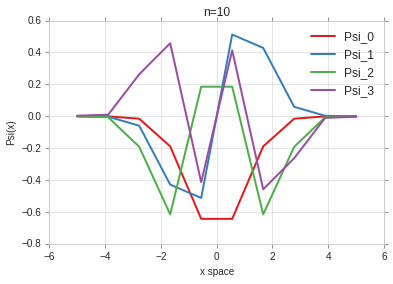

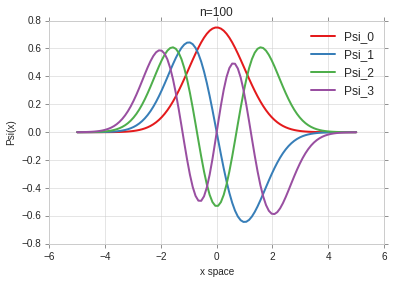

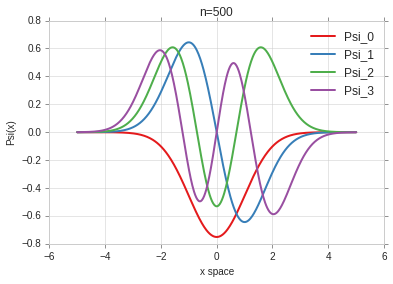

## 5.d - Compare with finite differences.
We previously used the function **build_H_matrix** to build a hamiltonian matrix via finite differences, now compare this method with DVR by ploting the error percent deviation ($\frac{Error}{|\epsilon_k|}$) between eigenvalues for \(N=100\), \(N=500\) and \(N=1000\).


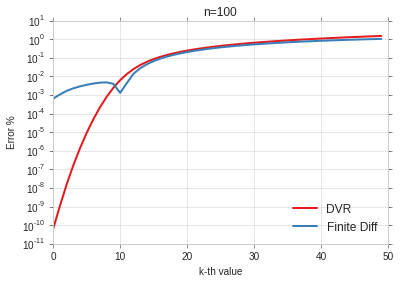

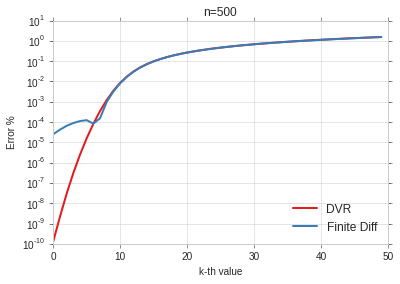

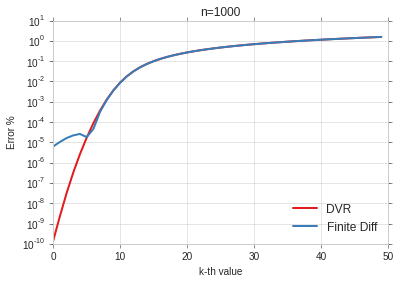

# <i class="fa fa-check-circle-o"></i> Exercise 6: <br> Time-depedent Schrödinger equation with DVR.

You can also look at the time evolution of states!

In particular, remember that for a time-independent Hamiltonian, the
time evolution operator is $$\hat{U}=e^{-\frac{i}{\hbar}\hat{H}t}$$
We have seen in class that 
$$\hat{U}\left|\Psi_{n}\right\rangle =e^{-\frac{i}{\hbar}\epsilon_{n}t}\left|\Psi_{n}\right\rangle $$
with $\epsilon_{n}$ the eigenvalues and $\Psi_{n}$ the eigenvectors
of $\hat{H}$. 

This means you can solve the time-independent problem and then then solve for the time-dependent problem via $\hat{U}$

## 6.a - <i class="fa fa-pencil"></i> $\hat{U}$ in terms of our basis
### Find the coordinate grid basis representation of operator:


$$U_{ij}=\left\langle x_{i}\left|e^{-\frac{i}{\hbar}\hat{H}t}\right|x_{j}\right\rangle =\sum_{kl}\Psi_{k}^{*}(x_{i})\Psi_{l}(x_{j})\left\langle \Psi_{k}\right|\hat{U}\left|\Psi_{l}\right\rangle $$

Proof/Answer here

## 6.b - Build the matrix operator $\hat{U}$

You should make a function called **time_evolution** that recieves as inputs:

* **t:** a scalar representing time.
* **evecs:** an array of eigenvectors.
* **evals:** an array of eigenvalues.

and this should return the U matrix.

In [2]:
def time_evolution(t,evecs,evals):
    N = len(evals)
    U  = np.zeros((N,N),dtype=complex);

    return U

## 6.c - Wavefunction superposition at multiple times

Introduce the state 
$$\psi(x,t=0)=\Psi_{0}(x)+\Psi_{1}(x)$$

Here $\Psi_{i}$ is the $i-th$ eigenstate of the Hamiltonian with the Harmonic potential.

Don't forget to normalize your wavefunction!


### <i class="fa fa-line-chart"></i>Plot the pdf for different times
Starting from $\psi(x,t=0)$, use your time evolution operator to obtain $|\psi(x,t=1)|^2$, $|\psi(x,t=1.5)|^2$
and $|\psi(x,t=2)|^2$.

**Note:** Unitary time evolution conserves norm so it is not necessary to renormalize a wavefunction.

**Note:** You can do matrix multiplication $X \cdot y$ in numpy with **np.dot(X,y).T**, the **.T** is to transpose the vector in to it's original shape.

/usr/lib/python2.7/dist-packages/numpy/core/numeric.py:460: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


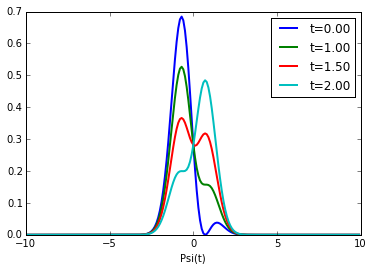

## 6.d - <i class="fa fa-video-camera"></i> Create an animation for a time evolving $\Psi$

Propagate this state side-by-side using DVR and finite differences simultaneously by reapplying the operator $\hat{U}(t=0.10)$ iteratively and propagate for \(200\) timesteps.

**Hint:** We recommend you use two variables to save your current and previous wavefunction for each iteration, using **psi_now** and **psi_prev**.

In [18]:
# Time evolution parameters /variables
# assuming Psi is your t=0 eigenfunction
FRAMES=200
dt=0.1
psi_now = Psi
psi_prev = Psi

#We'll set up the figure for you
fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(-1,1)) #create single axis in figure
plt.xlabel('position (x)')
plt.ylabel('Psi(x)')
plt.title('Time evolving wavefunction')
line, = plt.plot([], [], lw=2) #line is a plot.... 

#the base frame upon which the animation takes place.
def init():
    line.set_data(x,psi_now)
    psi_prev = psi_now
    return line

### animation function
def animate(t): 
    # so the functions knows we are using these 
    # variables from outside
    global psi_now
    global psi_prev
    # your update code here (ONE line)
    
    # update the line data
    line.set_data(x, psi_now)
    psi_prev = psi_now
    return line

#Let's create the animation!!!
anim = animation.FuncAnimation(fig, animate, init_func=init,  frames=FRAMES)
#save the animation
qworld.embedAnimation(anim,plt)

### <i class="fa fa-video-camera"></i> And also for the associated pdf

In [77]:
# Time evolution parameters /variables
FRAMES=200
dt=0.1
psi_now = Psi
psi_prev = Psi

#We'll set up the figure for you
fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(0,1)) #create single axis in figure
plt.xlabel('position (x)')
plt.ylabel('Probability')
plt.title('Time evolving wavefunction')
line, = plt.plot([], [], lw=2) #line is a plot.... 

#the base frame upon which the animation takes place.
def init():
    
    pdf = qworld.probabilityDensity(psi_now)
    line.set_data(x, pdf)
    psi_prev = psi_now
    return line,  

### animation function
def animate(t): 
    # so the function ''knows'' we are using these 
    # variables from outside
    global psi_now
    global psi_prev
    # your update code here, TWO lines
    
    # update the line data
    line.set_data(x, pdf)
    psi_prev = psi_now
    return line,

#Let's create the animation!!!
anim = animation.FuncAnimation(fig, animate, init_func=init,  frames=FRAMES)
#save the animation
qworld.embedAnimation(anim,plt)

###  <i class="fa fa-question-circle"></i> What do you notice? 
### Where is the behaviour or the superpositioned wavepacket?
###  Between Finite differences and DVR, Which method would remain more accurate for longer?

Answer here

# <i class="fa fa-angellist"></i> Congratulations! <br> You have conquered the 1D Schrödinger equation!